# Dependencies

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import time
from torch.optim import Adam

# Data

In [14]:
df = pd.read_csv("1_RN_data_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()
d.shape

(408, 4)

# NN Fitting

In [15]:
def NN(X_train, y_train):
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X_train.shape[1]
    #add model layers
    model.add(Dense(10, activation='tanh', input_shape=(n_cols,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=[early_stopping_monitor])
    return history, model

In [16]:
history, reg = NN(d[:,:3], d[:,3])

2022-03-08 17:38:45.579952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-08 17:38:45.580795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 17:38:45.587820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-08 17:38:45.588100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-08 17:38:45.588217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/1000
11/11 [==============================] - 1s 45ms/step - loss: 1.1056 - val_loss: 0.6641
Epoch 2/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5438 - val_loss: 0.2683
Epoch 3/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.2810 - val_loss: 0.1613
Epoch 4/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2272 - val_loss: 0.1547
Epoch 5/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2185 - val_loss: 0.1457
Epoch 6/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2048 - val_loss: 0.1328
Epoch 7/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1898 - val_loss: 0.1229
Epoch 8/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.1788 - val_loss: 0.1144
Epoch 9/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.1683 - val_loss: 0.1064
Epoch 10/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.1575 - val_lo

11/11 [==============================] - 0s 15ms/step - loss: 0.0252 - val_loss: 0.0124
Epoch 82/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.0245 - val_loss: 0.0126
Epoch 83/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0245 - val_loss: 0.0122
Epoch 84/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0238 - val_loss: 0.0120
Epoch 85/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0241 - val_loss: 0.0120
Epoch 86/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.0233 - val_loss: 0.0122
Epoch 87/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0229 - val_loss: 0.0119
Epoch 88/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0228 - val_loss: 0.0117
Epoch 89/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.0224 - val_loss: 0.0113
Epoch 90/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.0218 - val_loss: 0

# Results

In [21]:
def sort(data):
    models = []
    model = np.unique(data[:,[0,1,2]], axis=0)
    
    for i in model:
        models.append(data[np.where((data[:,[0,1,2]] == i).all(axis=1))])

    return models 

def compare(models):
    results_all = []
    results_sep = []
    for model in models:
        result = np.zeros((len(model),6))
        model = np.delete(model, [2,4], 1)

        result[:,4] = np.squeeze(reg.predict(model[:,:-1]), axis=-1)
        results_all.append(result)
        
        # a/c separated
        result = np.zeros((len(model),6))
        if model[0,0] <= 1:
            result[:,4] = np.squeeze(reg.predict(model[:,:-1]), axis=-1)

        elif model[0,0] > 1:
            result[:,4] = np.squeeze(reg.predict(model[:,:-1]), axis=-1)

        else:
            print("Something wrong!")

        results_sep.append(result)
        
    return results_all, results_sep

def plot(models, results_all, results_sep, model_num):
    plt.scatter(models[model_num][:,-3], models[model_num][:,-1], label="Ground Truth")
    plt.plot(models[model_num][:,-3], results_all[model_num][:,4], label="NN all")
    plt.title("a/c={}; a/t={}; c/b={}".format(models[model_num][0,0],
                                             models[model_num][0,1],
                                             models[model_num][0,2]))
    plt.xlabel("phi")
    plt.ylabel("Mg")
    plt.legend()
    plt.show()
    return

In [18]:
# Loading test dataset
df = pd.read_csv("../../data/3_datasets_new/1_RN_data.csv")
d = df.to_numpy()

In [19]:
models = sort(d)
len(models)

32

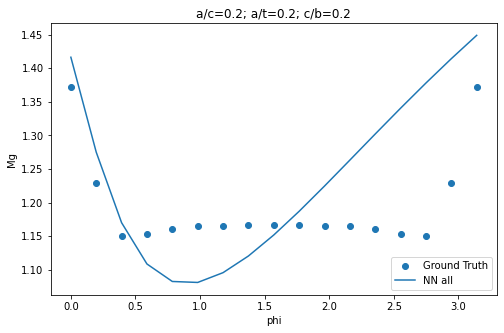

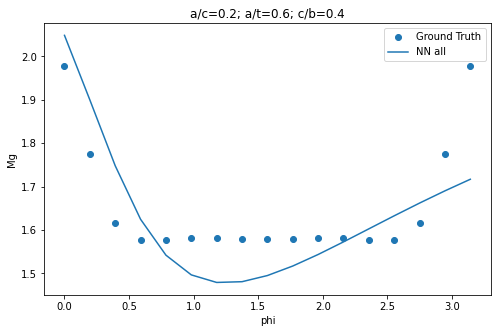

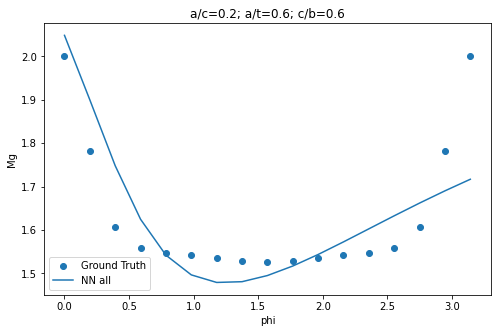

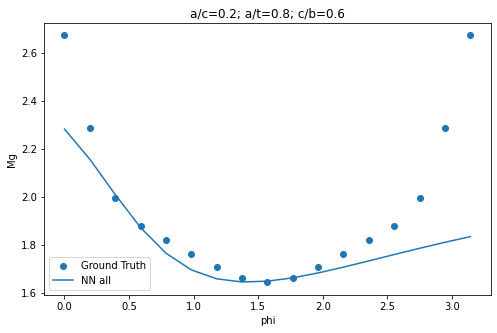

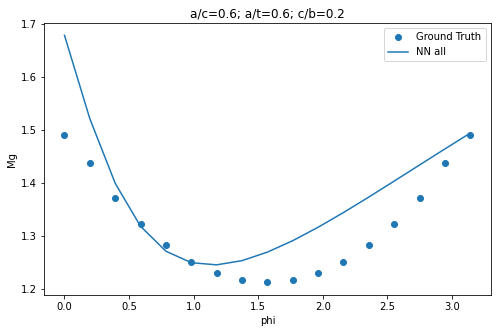

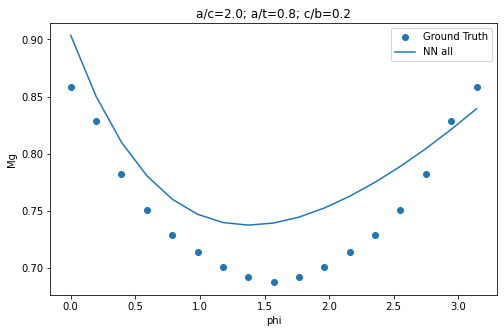

In [22]:
results_all, results_sep = compare(models)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/8))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/6))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

In [23]:
np.save("NN_results_all.npy", results_all)
np.save("NN_results_sep.npy", results_sep)